In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest/test/tea-mosquito-bug/tea-mosquito-bug_09.jpg
/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest/test/tea-mosquito-bug/tea-mosquito-bug_08.jpg
/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest/test/tea-mosquito-bug/tea-mosquito-bug_06.jpg
/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest/test/tea-mosquito-bug/tea-mosquito-bug_42.jpg
/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest/test/tea-mosquito-bug/tea-mosquito-bug_36.jpg
/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest/test/tea-mosquito-bug/tea-mosquito-bug_25.jpg
/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest/test/tea-mosquito-bug/tea-mosquito-bug_07.jpg
/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest/test/tea-mosquito-bug/tea-mosquito-bug_13.jpg
/kaggle/input/tea-leaves-insect-dataset/

## TITLE: Deep Learning for Precision Agriculture: The BAU-Insectv2 Dataset

**1. Overview**
**The BAU-Insectv2 Agricultural Plant Insect Dataset is a publicly available collection of high-resolution images designed for deep learning applications in agricultural pest detection. It was developed through a collaboration between Daffodil International University, Bangladesh Agricultural University, and Dongseo University, with the aim of improving precision agriculture by leveraging artificial intelligence for insect identification.**

**2. Purpose and Importance**

**Pests and insects significantly impact crop yields and food security. Traditional pest control methods often rely on manual inspection, which is time-consuming and prone to errors. The BAU-Insectv2 dataset is specifically designed to aid AI-powered solutions for real-time pest detection, monitoring, and classification. By training convolutional neural networks (CNNs) and other machine learning models with this dataset, researchers can develop automated systems for precision agriculture, reducing reliance on pesticides and improving early pest detection.**

**3. Key Features of the Dataset**

**Diverse Image Collection: The dataset consists of over 2,000 high-resolution images spanning multiple classes of agricultural insects.
High-Quality Images: Each image captures detailed views of plant-insect interactions, ensuring accurate feature extraction for deep learning models.
Class Labeling: The dataset is labeled into nine distinct insect categories, allowing for multi-class classification problems.
Designed for Deep Learning: Optimized for training CNNs and other AI-based computer vision models to detect and classify insects.
Focus on South Asian Agriculture: The dataset is particularly relevant for pest management in Bangladesh, India, and neighboring agricultural regions.
Availability: The dataset is publicly available under the Creative Commons Attribution 4.0 International License, making it freely accessible for academic and industrial research.**

**4. Dataset Composition and Structure**

**The BAU-Insectv2 dataset contains images of insects commonly found in agricultural fields, classified based on species and their impact on crops. The dataset structure follows a folder-based arrangement, where each category represents a specific insect type.**

Classes in the Dataset (Example)

Aphids – Sap-sucking pests that weaken plants.

Beetles – A diverse group of insects, some of which are harmful to crops.

Caterpillars – Larvae of moths and butterflies that feed on leaves.

Grasshoppers – Known for causing defoliation in crops.

Leafhoppers – Insects that spread plant diseases through feeding.

Whiteflies – Tiny insects that damage plants by sucking sap.

Thrips – Small pests that cause significant damage to flowers and vegetables.

Weevils – Insects that infest stored grains and crops.

Moths – Some species lay eggs on crops, leading to caterpillar infestations.

Each image is annotated with metadata that includes insect species, location, and plant type.

**5. Applications of BAU-Insectv2 Dataset**

The dataset provides a strong foundation for multiple research areas:

Automated Pest Detection – AI models can identify and categorize pests in real-time using drones or smart devices.

Precision Agriculture – Early detection of pests helps in targeted pesticide application, reducing chemical usage.

Computer Vision Research – Researchers can use the dataset to train CNNs, YOLO, or Vision Transformers for object detection and classification.

AgriTech Development – AI-based mobile applications and IoT devices for real-time pest monitoring can be developed.

Disease Spread Analysis – Insects that transmit plant diseases can be tracked using AI-driven forecasting models.

**6. Research Opportunities**
The dataset opens new avenues for agricultural and AI research, including:

Transfer Learning – Fine-tuning pre-trained models (ResNet, EfficientNet, etc.) on the dataset.

Few-Shot Learning – Developing models that require fewer training samples.

Generative AI in Agriculture – Using GANs to create synthetic insect images for data augmentation.

Explainable AI (XAI) – Understanding how AI models classify insects through saliency maps and heatmaps.

## Import libraries

In [2]:
import os
from tqdm import tqdm
import numpy as np

In [3]:
# Machine Learning utilities
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [4]:
# Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model

In [5]:
import cv2  
import matplotlib.pyplot as plt

In [6]:
import warnings 
warnings.filterwarnings('ignore')

## Import dataset

In [7]:
directory = '/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest/train'

img = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

In [8]:
img

['tea-mosquito-bug', 'holotrichia', 'red-spider-mite', 'thrips', 'tea-aphid']

In [9]:
import os
print(os.listdir("/kaggle/input/"))

['tea-leaves-insect-dataset']


In [10]:
print(os.listdir("/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest"))

['test', 'train']


In [11]:
import os

# Detect dataset structure
dataset_root = "/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest"
subdirs = os.listdir(dataset_root)
print("Dataset structure:", subdirs)

# Determine if 'pest/' is required
if "pest" in subdirs:
    dataset_root = os.path.join(dataset_root, "pest")

# Now proceed with loading the images
data_dirs = ["train", "test"]
labels = os.listdir(os.path.join(dataset_root, "train"))  # Auto-detect labels

image_data, label_data = [], []
image_size = 150

for data_dir in data_dirs:
    print(f"📂 Processing '{data_dir}' directory...")
    
    for label_idx, label in enumerate(labels):
        data_path = os.path.join(dataset_root, data_dir, label)

        if not os.path.exists(data_path):
            print(f"⚠️ Warning: Missing directory - {data_path}")
            continue

        for img_file in os.listdir(data_path):
            img_path = os.path.join(data_path, img_file)
            image = cv2.imread(img_path)

            if image is None:
                print(f"❌ Skipping corrupted file: {img_path}")
                continue

            image = cv2.resize(image, (image_size, image_size))
            image_data.append(image)
            label_data.append(label_idx)

print(f"\n✅ Data processing complete! Loaded {len(image_data)} images.")


Dataset structure: ['pest']
📂 Processing 'train' directory...
📂 Processing 'test' directory...

✅ Data processing complete! Loaded 1591 images.


In [12]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

image_data, label_data = shuffle(image_data, label_data, random_state=42)
image_data = np.array(image_data, dtype=np.float32) / 255.0
label_data = np.array(label_data, dtype=np.int32)  
X_train, X_test, Y_train, Y_test = train_test_split(image_data, label_data, test_size=0.2, random_state=42)

print(f"✅ Data ready for training! Training samples: {len(X_train)}, Test samples: {len(X_test)}")


✅ Data ready for training! Training samples: 1272, Test samples: 319


In [13]:
from keras.utils import to_categorical

Y_train = np.array(Y_train, dtype=np.int32)
Y_test = np.array(Y_test, dtype=np.int32)

Y_train = to_categorical(Y_train, num_classes=len(labels))
Y_test = to_categorical(Y_test, num_classes=len(labels))

print(f"✅ Labels converted to one-hot encoding. Shape: {Y_train.shape}")

✅ Labels converted to one-hot encoding. Shape: (1272, 5)


In [14]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model



vgg = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False  
x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Prevents overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(len(labels), activation='softmax')(x)  # Dynamic class count
modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 19,042,117 (72.64 MB)

 Trainable params: 4,327,429 (16.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import CategoricalCrossentropy
from keras.metrics import AUC

modelvgg.compile(
    optimizer=Adam(learning_rate=0.0001),  
    loss=CategoricalCrossentropy(),
    metrics=['accuracy', AUC(name='auc')]
)

callback = EarlyStopping(
    monitor='val_loss', patience=8, restore_best_weights=True, verbose=1
)

print("✅ Model compiled successfully!")

✅ Model compiled successfully!


In [16]:
history = modelvgg.fit(
    X_train, Y_train,
    epochs=50,              
    batch_size=32,         
    validation_data=(X_test, Y_test),
    callbacks=[callback],  
    verbose=1
)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 519ms/step - accuracy: 0.3214 - auc: 0.6120 - loss: 1.6920 - val_accuracy: 0.8370 - val_auc: 0.9669 - val_loss: 0.7832
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6425 - auc: 0.8998 - loss: 0.9198 - val_accuracy: 0.9122 - val_auc: 0.9912 - val_loss: 0.4503
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.8034 - auc: 0.9649 - loss: 0.5817 - val_accuracy: 0.9467 - val_auc: 0.9971 - val_loss: 0.2853
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8554 - auc: 0.9826 - loss: 0.4132 - val_accuracy: 0.9655 - val_auc: 0.9994 - val_loss: 0.1718
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9227 - auc: 0.9920 - loss: 0.2919 - val_accuracy: 0.9781 - val_auc: 0.9998 - val_loss: 0.1171
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9450 - auc: 0.9967 - loss: 0.2025 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.0848
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 81m

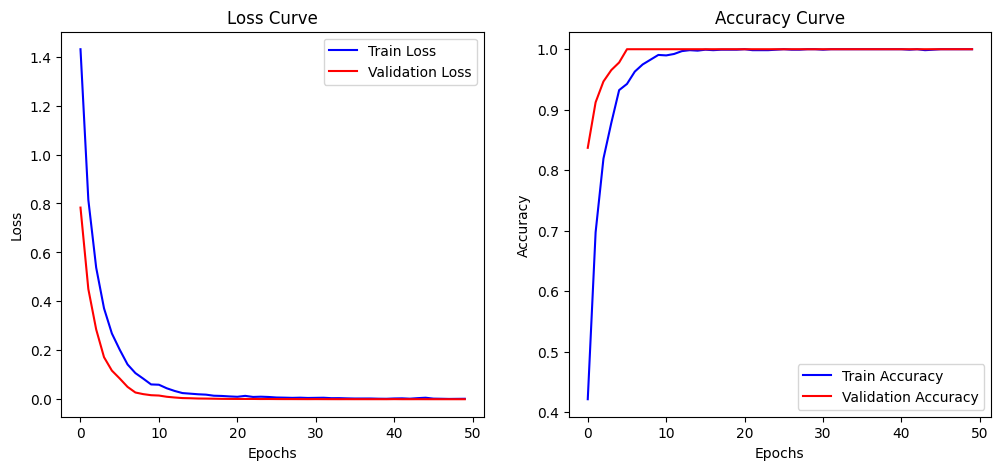

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Train Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

In [18]:
# Evaluate on Train Data
train_results = modelvgg.evaluate(X_train, Y_train, verbose=1)
train_loss, train_acc, train_auc = train_results  # Unpacking 3 values

# Evaluate on Test Data
test_results = modelvgg.evaluate(X_test, Y_test, verbose=1)
test_loss, test_acc, test_auc = test_results  # Unpacking 3 values

# Print Results
print(f"✅ Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train AUC: {train_auc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}, Test AUC: {test_auc:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 3.3269e-05
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 7.1869e-05
✅ Train Loss: 0.0000, Train Accuracy: 1.0000, Train AUC: 1.0000
✅ Test Loss: 0.0001, Test Accuracy: 1.0000, Test AUC: 1.0000


In [19]:
train_results = modelvgg.evaluate(X_train, Y_train, verbose=1)
print(f"Train Results: {train_results}")  

test_results = modelvgg.evaluate(X_test, Y_test, verbose=1)
print(f"Test Results: {test_results}")  

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 3.3269e-05
Train Results: [3.34371070493944e-05, 1.0, 1.0]
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 7.1869e-05
Test Results: [5.9607995353871956e-05, 1.0, 1.0]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
Confusion Matrix:
 [[62  0  0  0  0]
 [ 0 65  0  0  0]
 [ 0  0 70  0  0]
 [ 0  0  0 62  0]
 [ 0  0  0  0 60]]


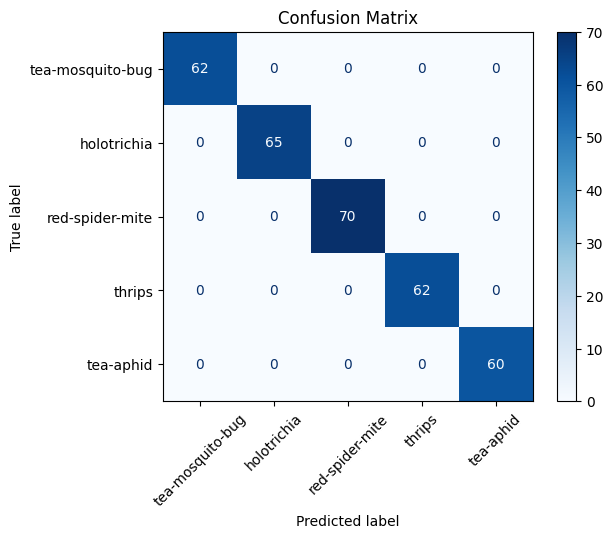

In [20]:
predictions = modelvgg.predict(X_test, verbose=1)  
y_pred = np.argmax(predictions, axis=1)  
y_test = np.argmax(Y_test, axis=1)  

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

display_cm = ConfusionMatrixDisplay(cm, display_labels=labels)
display_cm.plot(cmap="Blues", xticks_rotation=45)  
plt.title("Confusion Matrix")
plt.show()

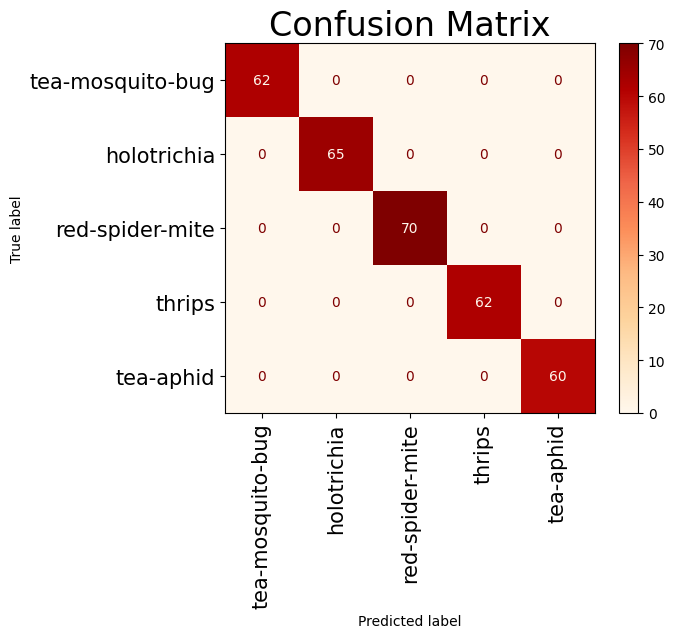

Classification Report:
                   precision    recall  f1-score   support

tea-mosquito-bug       1.00      1.00      1.00        62
     holotrichia       1.00      1.00      1.00        65
 red-spider-mite       1.00      1.00      1.00        70
          thrips       1.00      1.00      1.00        62
       tea-aphid       1.00      1.00      1.00        60

        accuracy                           1.00       319
       macro avg       1.00      1.00      1.00       319
    weighted avg       1.00      1.00      1.00       319



In [21]:
display_cm = ConfusionMatrixDisplay(cm, display_labels=labels)
display_cm.plot(cmap='OrRd', xticks_rotation=90)  # Proper method call

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=labels))

## ROC Curve

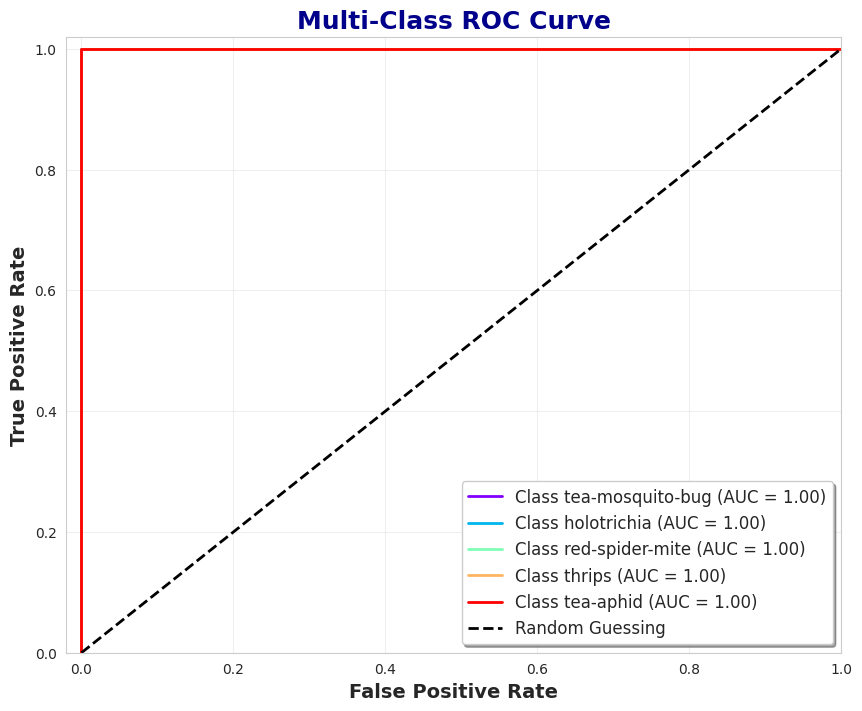

In [22]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from matplotlib.cm import get_cmap

n_classes = Y_test.shape[1]

fpr = {} 
tpr = {}  
roc_auc = {} 

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
cmap = get_cmap("rainbow", n_classes)  

for i in range(n_classes):
    plt.plot(
        fpr[i], tpr[i], color=cmap(i / n_classes), lw=2,
        label=f'Class {labels[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guessing")


plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Multi-Class ROC Curve', fontsize=18, fontweight='bold', color="darkblue")

# Add legend and grid
plt.legend(loc="lower right", fontsize=12, frameon=True, shadow=True)
plt.grid(alpha=0.3)

# Save and show plot
plt.savefig("Enhanced_ROC_Curve.png", dpi=600, bbox_inches='tight', transparent=True)
plt.show()

In [23]:
from tensorflow.keras.models import Model

# Save after training
modelvgg.save("vgg16_classifier.h5")

In [24]:
from tensorflow.keras.models import load_model

model = load_model("/kaggle/working/vgg16_classifier.h5")

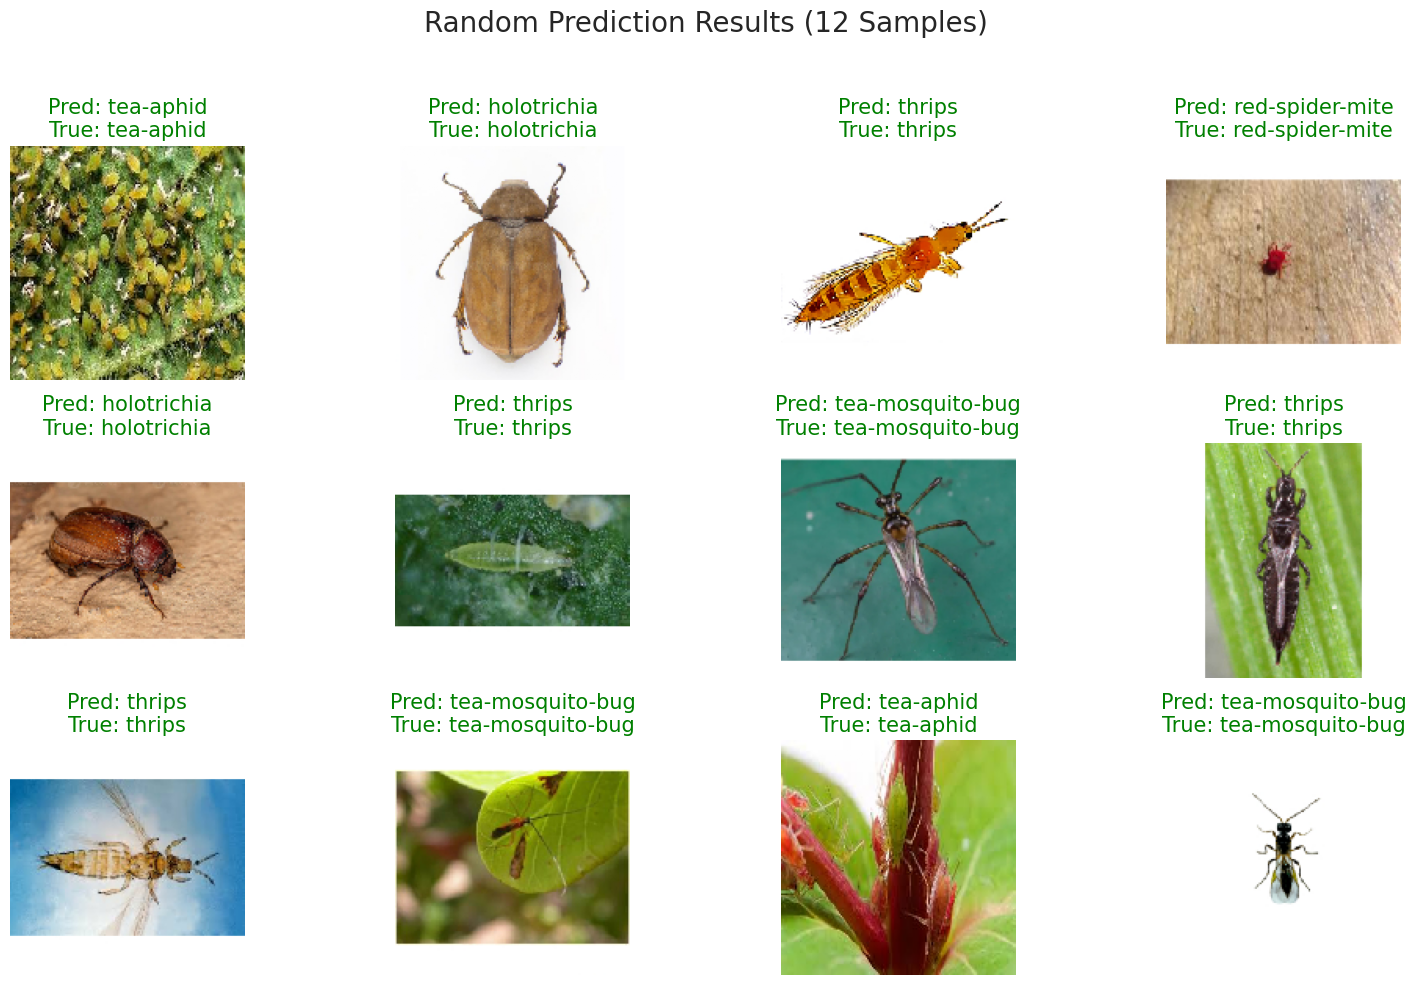

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras.preprocessing import image

# --- Configuration ---
test_dir = "/kaggle/input/tea-leaves-insect-dataset/TeaLeavesInsect-Dataset/pest/pest/test"   # Update to your actual test path
img_size = (150, 150)       # Change based on your model input
class_names = ['tea-mosquito-bug', 'holotrichia', 'red-spider-mite', 'thrips', 'tea-aphid']  # Your classes

# --- Collect all test image paths with true labels ---
all_test_images = []
for cls in class_names:
    cls_path = os.path.join(test_dir, cls)
    files = os.listdir(cls_path)
    for fname in files:
        all_test_images.append((os.path.join(cls_path, fname), cls))

# --- Randomly sample 12 images ---
sampled = random.sample(all_test_images, 12)

sample_images = []
true_labels = []
predicted_labels = []

for img_path, true_label in sampled:
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    sample_images.append(img_array)
    true_labels.append(true_label)
    
    pred = model.predict(np.expand_dims(img_array, axis=0), verbose=0)
    predicted_labels.append(class_names[np.argmax(pred)])

# --- Display images ---
plt.figure(figsize=(16, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(sample_images[i])
    pred_label = predicted_labels[i]
    true_label = true_labels[i]
    color = "green" if pred_label == true_label else "red"
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=15, color=color)
    ax.axis("off")

plt.suptitle("Random Prediction Results (12 Samples)", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()